In [3]:
import numpy as np

In [4]:
!ls

2018-11-18				KL_violin.py
aggregated.csv				mimic_handcrafted_proposal.py
aggregator.py				pretrained.pyt
April10					proposal_visualize.py
baseline_experiments			__pycache__
blabla					rw_experiment_dummy.py
cc_create_random_walk_experiment.py	rw_experiment.py
cc_random_walk_expectation_analysis.py	simonsupdate.py
cc_scripts				test
cycle_experiments			tt_IS_baseline.py
final_figures				tt_MC_baseline.py
img					tt_rvi.py
KL_plots_PRETRAINTRAIN.pdf		Tutorial.ipynb
KL_plots_SCRATCHTRAIN.pdf		two_window_experiment.py
KL_summarizer.py			Untitled.ipynb


In [15]:
statistic = 'KLpq'
template=('./2018-11-18'
          '/IS_baseline_results'
          '/IS_baseline_experiment'
          '/end_point{end_point}'
          '/proposal_type{proposal_type}'
          '/softness_coefficient{softness_coefficient}')
#           '/Seed{seed}'
#           '/ISSampler_{statistic}.txt')

'./2018-11-18/IS_baseline_results/IS_baseline_experiment/end_point0/proposal_typesoft/softness_coefficient*'

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
import os
from glob import glob

In [58]:
def get_hyperparameter(path, hyperparameter_name, splitter='/'):
    return path.split(hyperparameter_name)[1].split(splitter)[0]

In [45]:
def get_hyperparameters(template, hyperparameter_name):
    return map(lambda x : get_hyperparameter(x, hyperparameter_name), glob(template))

def get_files_by_hyperparameter(template, hyperparameter_name):
    return {x: template.replace('*', x) \
            for x in get_hyperparameters(template, hyperparameter_name)}

In [152]:
def summarize_data(template_file, statistic, hyperparameters, sampler_name='ISSampler', return_pd=True):
    glob_path = os.path.join(template_file, 'Seed*', sampler_name + '_' + statistic + '.txt')
    files = glob(glob_path)
    datas = []
#     print(files)
    for file_ in files:
        raw_data = np.loadtxt(file_, delimiter=',')
        data = pd.DataFrame(data=raw_data, columns=[statistic, 'trajectories'])
        for hp in hyperparameters:
            data[hp] = get_hyperparameter(file_, hp)
            
        datas.append(data)
    
    if return_pd:
        return pd.concat(datas, ignore_index=True)
    else:
        return datas

In [19]:
import pandas as pd

In [209]:
extracted_data = []
extracted_data.extend(summarize_data(
    './2018-11-18/IS_baseline_results/IS_baseline_experiment/end_point24/proposal_type*/softness_coefficient*',
    statistic='KLpq',
    hyperparameters=['softness_coefficient', 'proposal_type', 'end_point', 'Seed'],
    return_pd=False
))
extracted_data.extend(summarize_data(
    './2018-11-18/IS_baseline_results/IS_baseline_experiment/end_point0/proposal_type*/softness_coefficient*',
    statistic='KLpq',
    hyperparameters=['softness_coefficient', 'proposal_type', 'end_point', 'Seed'],
    return_pd=False
))
extracted_data.extend(summarize_data(
    './2018-11-18/IS_baseline_results/IS_baseline_experiment/end_point12/proposal_type*/softness_coefficient*',
    statistic='KLpq',
    hyperparameters=['softness_coefficient', 'proposal_type', 'end_point', 'Seed'],
    return_pd=False
))
extracted_data.extend(summarize_data(
    './2018-11-18/IS_baseline_results/IS_baseline_experiment/end_point36/proposal_type*/softness_coefficient*',
    statistic='KLpq',
    hyperparameters=['softness_coefficient', 'proposal_type', 'end_point', 'Seed'],
    return_pd=False
))
extracted_data.extend(summarize_data(
    './2018-11-18/IS_baseline_results/IS_baseline_experiment/end_point48/proposal_type*/softness_coefficient*',
    statistic='KLpq',
    hyperparameters=['softness_coefficient', 'proposal_type', 'end_point', 'Seed'],
    return_pd=False
))

extracted_data = pd.concat(extracted_data, ignore_index=True)
extracted_data = extracted_data.apply(pd.to_numeric, errors='ignore',)

In [213]:
extracted_data[extracted_data.trajectories == 500].groupby(
    ['end_point', 'proposal_type', 'softness_coefficient']).mean()

KLpq  trajectories  Seed
end_point proposal_type softness_coefficient                              
0         funnel        1.068392              0.005150         500.0   2.0
          soft          0.208296              0.005106         500.0   2.0
                        0.336414              0.006271         500.0   2.0
                        0.741058              0.003658         500.0   2.0
                        1.081529              0.007188         500.0   2.0
                        1.488248              0.007431         500.0   2.0
12        funnel        1.068392              0.033217         500.0   1.5
          soft          0.208296              0.024897         500.0   1.5
                        0.336414              0.016385         500.0   1.5
                        0.741058              0.018931         500.0   1.5
                        1.081529              0.006876         500.0   1.5
                        1.488248              0.015545         500.0   1.5
24        funnel        1.068392                   NaN         500.0   1.5
          soft          0.208296                   NaN         500.0   1.5
                        0.336414                   NaN         500.0   1.5
                        0.741058                   NaN         500.0   1.5
                        1.081529              0.008881         500.0   1.5
                        1.488248              0.021989         500.0   1.5
36        funnel        1.068392                   NaN         500.0   1.5
          soft          0.208296                   NaN         500.0   1.5
                        0.336414                   NaN         500.0   1.5
                        0.741058                   NaN         500.0   1.5
                        1.081529                   NaN         500.0   1.5
                        1.488248              0.078999         500.0   1.5
48        funnel        1.068392                   NaN         500.0   1.5
          soft          0.208296                   NaN         500.0   1.5
                        0.336414                   NaN         500.0   1.5
                        0.741058                   NaN         500.0   1.5
                        1.081529                   NaN         500.0   1.5
                        1.488248                   NaN         500.0   1.5

In [216]:
extracted_data[extracted_data.trajectories == 5000].groupby(
    ['end_point', 'proposal_type', 'softness_coefficient']).count()

KLpq  trajectories  Seed
end_point proposal_type softness_coefficient                          
0         funnel        1.068392                 5             5     5
          soft          0.208296                 5             5     5
                        0.336414                 5             5     5
                        0.741058                 5             5     5
                        1.081529                 5             5     5
                        1.488248                 5             5     5
12        funnel        1.068392                 4             4     4
          soft          0.208296                 4             4     4
                        0.336414                 4             4     4
                        0.741058                 4             4     4
                        1.081529                 4             4     4
                        1.488248                 4             4     4
24        funnel        1.068392                 0             4     4
          soft          0.208296                 2             4     4
                        0.336414                 1             4     4
                        0.741058                 4             4     4
                        1.081529                 4             4     4
                        1.488248                 4             4     4
36        funnel        1.068392                 0             4     4
          soft          0.208296                 0             4     4
                        0.336414                 0             4     4
                        0.741058                 0             4     4
                        1.081529                 0             4     4
                        1.488248                 4             4     4
48        funnel        1.068392                 0             4     4
          soft          0.208296                 0             4     4
                        0.336414                 0             4     4
                        0.741058                 0             4     4
                        1.081529                 2             4     4
                        1.488248                 0             4     4

In [221]:
extracted_data[extracted_data.trajectories == 5000].groupby(
    ['end_point', 'proposal_type', 'softness_coefficient']).std()/np.sqrt(5)

KLpq  trajectories      Seed
end_point proposal_type softness_coefficient                                  
0         funnel        1.068392              0.000085           0.0  0.707107
          soft          0.208296              0.000232           0.0  0.707107
                        0.336414              0.000211           0.0  0.707107
                        0.741058              0.000106           0.0  0.707107
                        1.081529              0.000106           0.0  0.707107
                        1.488248              0.000418           0.0  0.707107
12        funnel        1.068392              0.000380           0.0  0.577350
          soft          0.208296              0.000529           0.0  0.577350
                        0.336414              0.000200           0.0  0.577350
                        0.741058              0.000304           0.0  0.577350
                        1.081529              0.000220           0.0  0.577350
                        1.488248              0.000602           0.0  0.577350
24        funnel        1.068392                   NaN           0.0  0.577350
          soft          0.208296              0.013765           0.0  0.577350
                        0.336414                   NaN           0.0  0.577350
                        0.741058              0.000965           0.0  0.577350
                        1.081529              0.001610           0.0  0.577350
                        1.488248              0.004076           0.0  0.577350
36        funnel        1.068392                   NaN           0.0  0.577350
          soft          0.208296                   NaN           0.0  0.577350
                        0.336414                   NaN           0.0  0.577350
                        0.741058                   NaN           0.0  0.577350
                        1.081529                   NaN           0.0  0.577350
                        1.488248              0.118890           0.0  0.577350
48        funnel        1.068392                   NaN           0.0  0.577350
          soft          0.208296                   NaN           0.0  0.577350
                        0.336414                   NaN           0.0  0.577350
                        0.741058                   NaN           0.0  0.577350
                        1.081529              0.000507           0.0  0.577350
                        1.488248                   NaN           0.0  0.577350

/home/ml/zahmed8/zaf-tmp-pyt04/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/ml/zahmed8/zaf-tmp-pyt04/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'EndPoint=0')

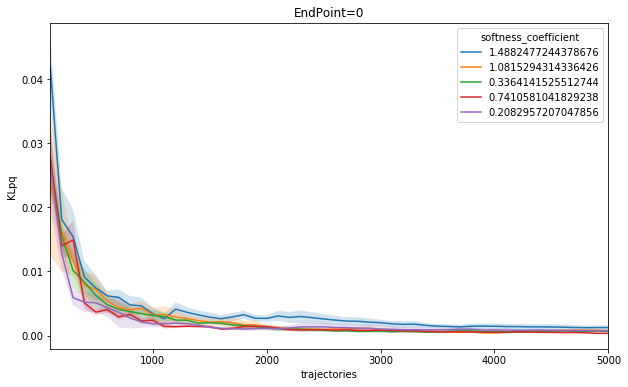

In [193]:
plt.figure(figsize=(10, 6))
sns.tsplot(
    data=extracted_data[np.isclose(extracted_data.end_point, 0)],
    unit='Seed', value='KLpq', time='trajectories', condition='softness_coefficient')
plt.title('EndPoint=0')

/home/ml/zahmed8/zaf-tmp-pyt04/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/ml/zahmed8/zaf-tmp-pyt04/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'EndPoint=12')

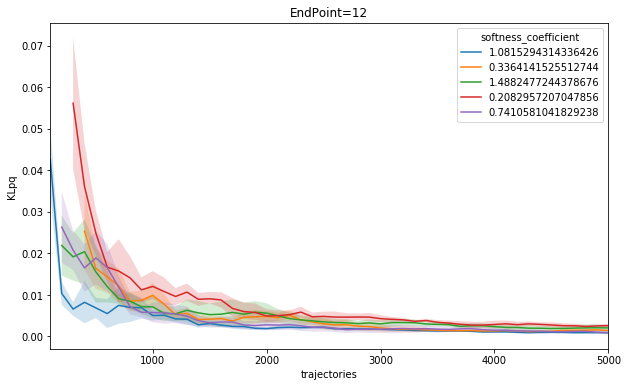

In [194]:
plt.figure(figsize=(10, 6))
sns.tsplot(
    data=extracted_data[np.isclose(extracted_data.end_point, 12)],
    unit='Seed', value='KLpq', time='trajectories', condition='softness_coefficient')
plt.title('EndPoint=12')

/home/ml/zahmed8/zaf-tmp-pyt04/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/ml/zahmed8/zaf-tmp-pyt04/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'EndPoint=24')

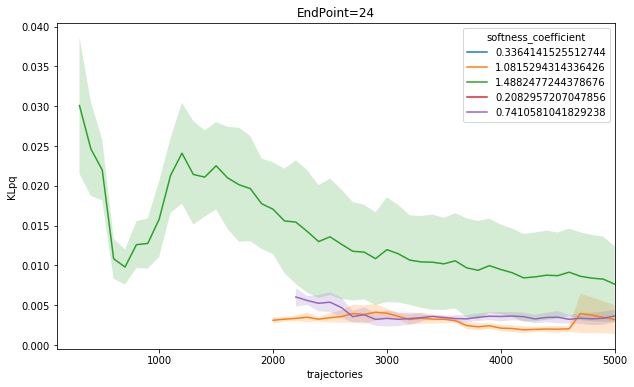

In [195]:
plt.figure(figsize=(10, 6))
sns.tsplot(
    data=extracted_data[np.isclose(extracted_data.end_point, 24)],
    unit='Seed', value='KLpq', time='trajectories', condition='softness_coefficient')
plt.title('EndPoint=24')